In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Method 1 

In [30]:
# Constants
COLORS = ['Red', 'Green', 'Orange', 'Blue']
G = 6.674e-11  # gravitational constant

# Particle class
class Particle:
    def __init__(self, color, pos, vel, mass, gravity):
        self.color = color
        self.pos = np.array(pos, dtype=float)  # Convert pos to float array
        self.vel = np.array(vel, dtype=float)  # Convert vel to float array
        self.mass = mass
        self.gravity = gravity
    
    def update(self, dt):
        # Update position and velocity using Newton's laws of motion
        self.pos += self.vel * dt
        self.vel += self.gravity * dt
    
# Particle system class
class ParticleSystem:
    def __init__(self, particles):
        self.particles = particles
    
    def update(self, dt):
        # Update each particle in the system
        for p in self.particles:
            p.update(dt)
      
    def interact(self):
        # Iterate through all pairs of particles and check for interactions
        for i in range(len(self.particles)):
            for j in range(i+1, len(self.particles)):
                p1 = self.particles[i]
                p2 = self.particles[j]
        
            if (p1.color, p2.color) in [(COLORS[0], COLORS[2]), (COLORS[1], COLORS[3])]:
                # Attract and merge particles of same color
                p1.vel = (p1.mass*p1.vel + p2.mass*p2.vel)/(p1.mass + p2.mass)
                p1.mass += p2.mass
                p1.gravity = G * p1.mass
                #self.particles.remove(p2)
                # This .. 
                self.particles = list(filter(lambda p: p != p2, self.particles))
                # or .. 
                # Create a new list of particles with p2 removed
                #new_particles = [p for p in self.particles if p != p2]
                # Replace the original list of particles with the new list
                #self.particles = new_particles

            elif (p1.color, p2.color) in [(COLORS[0], COLORS[3]), (COLORS[1], COLORS[2])]:
                # Repel particles of different color
                p1.vel = -p1.vel
                p2.vel = -p2.vel

In [3]:
# Test particle system
particles = [Particle(COLORS[0], np.array([0,0]), np.array([0,0]), 1, 0),
             Particle(COLORS[1], np.array([1,0]), np.array([0,0]), 1, 0),
             Particle(COLORS[2], np.array([2,0]), np.array([0,0]), 1, 0),
             Particle(COLORS[3], np.array([3,0]), np.array([0,0]), 1, 0)]
system = ParticleSystem(particles)

<IPython.core.display.Javascript object>


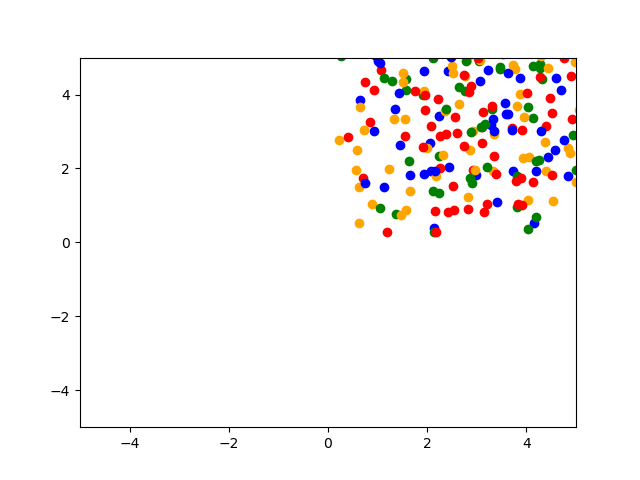

In [37]:
# Test particle system
np.random.seed(0)  # Set random seed for reproducibility
N = 1000  # Number of particles
particles = [Particle(COLORS[np.random.randint(4)], np.random.rand(2), np.random.rand(2), 1, 0) for _ in range(N)]
system = ParticleSystem(particles)

# Create figure and axis for animation
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

# Initialize empty plots
plots = [ax.plot([], [], 'o', color=p.color)[0] for p in particles]

# Animation function
def animate(i):
    # Update and interact particles
    system.update(0.05)
    system.interact()
  
    # Update plot data
    for p, plot in zip(particles, plots):
        plot.set_data(p.pos[0], p.pos[1])

    return plots

# Create and display animation
anim = animation.FuncAnimation(fig, animate, frames=100, interval=100)
plt.show()

In [5]:
# Print final state of particles
for p in system.particles:
    print(f'Color: {p.color}, Position: {p.pos}, Velocity: {p.vel}, Mass: {p.mass}, Gravity: {p.gravity}')

Color: Red, Position: [0.59284462 0.84426575], Velocity: [0.85794562 0.84725174], Mass: 1, Gravity: 0
Color: Blue, Position: [0.64589411 0.43758721], Velocity: [0.891773   0.96366276], Mass: 1, Gravity: 0
Color: Orange, Position: [0.47766512 0.81216873], Velocity: [0.47997717 0.3927848 ], Mass: 1, Gravity: 0
Color: Green, Position: [0.07103606 0.0871293 ], Velocity: [0.0202184  0.83261985], Mass: 1, Gravity: 0
Color: Orange, Position: [0.14035078 0.87008726], Velocity: [0.47360805 0.80091075], Mass: 1, Gravity: 0
Color: Green, Position: [0.78052918 0.11827443], Velocity: [0.63992102 0.14335329], Mass: 1, Gravity: 0
Color: Blue, Position: [0.75861562 0.10590761], Velocity: [0.47360042 0.18633234], Mass: 1, Gravity: 0
Color: Orange, Position: [0.45615033 0.56843395], Velocity: [0.0187898 0.6176355], Mass: 1, Gravity: 0
Color: Orange, Position: [0.22232139 0.38648898], Velocity: [0.90259848 0.44994999], Mass: 1, Gravity: 0
Color: Blue, Position: [0.43703195 0.6976312 ], Velocity: [0.06022

Color: Blue, Position: [0.32126473 0.79409034], Velocity: [0.12854083 0.50794585], Mass: 1, Gravity: 0
Color: Blue, Position: [0.54601389 0.8121854 ], Velocity: [0.81069635 0.71423997], Mass: 1, Gravity: 0
Color: Red, Position: [0.82578134 0.29673181], Velocity: [0.14682033 0.84671453], Mass: 1, Gravity: 0
Color: Orange, Position: [0.60736482 0.94168311], Velocity: [0.26217852 0.0963018 ], Mass: 1, Gravity: 0
Color: Blue, Position: [0.66102798 0.71677891], Velocity: [0.46727941 0.70301515], Mass: 1, Gravity: 0
Color: Orange, Position: [0.81137704 0.78803537], Velocity: [0.49597503 0.97584641], Mass: 1, Gravity: 0
Color: Blue, Position: [0.72219973 0.53417475], Velocity: [0.51993979 0.84253855], Mass: 1, Gravity: 0
Color: Orange, Position: [0.41878848 0.0204866 ], Velocity: [0.30527816 0.86038308], Mass: 1, Gravity: 0
Color: Green, Position: [0.18982769 0.55419876], Velocity: [0.51192061 0.59401973], Mass: 1, Gravity: 0
Color: Red, Position: [0.47445327 0.90974127], Velocity: [0.3846298

--- 

### Method 2 

In [13]:
# Constants
COLORS = ['Red', 'Blue']
G = 6.674e-11  # gravitational constant

# Particle class
class Particle:
    def __init__(self, color, pos, vel, mass, gravity):
        self.color = color
        self.pos = np.array(pos, dtype=float)
        self.vel = np.array(vel, dtype=float)
        self.mass = mass
        self.gravity = gravity
    
    def update(self, dt, box_size):
        # Update position and velocity using Newton's laws of motion
        self.pos += self.vel * dt
    
        # Check for boundary collisions and bounce back if necessary
        for i in range(2):
            if self.pos[i] < 0:
                self.pos[i] = -self.pos[i]
                self.vel[i] = -self.vel[i]
            elif self.pos[i] > box_size[i]:
                self.pos[i] = 2*box_size[i] - self.pos[i]
                self.vel[i] = -self.vel[i]
            self.vel += self.gravity * dt
    
# Particle system class 
class ParticleSystem:
    def __init__(self, particles, box_size):
        self.particles = particles
        self.box_size = box_size
    
    def update(self, dt):
        # Update each particle in the system
        for p in self.particles:
            p.update(dt, self.box_size)
      
    def interact(self):
        # Iterate through all pairs of particles and check for interactions
        for i in range(len(self.particles)):
            for j in range(i+1, len(self.particles)):
                p1 = self.particles[i]
                p2 = self.particles[j]

            if p1.color == p2.color:
                # Attract and merge particles of same color
                p1.vel = (p1.mass*p1.vel + p2.mass*p2.vel)/(p1.mass + p2.mass)
                p1.mass += p2.mass
                p1.gravity = G * p1.mass
                self.particles.remove(p2)
            elif p1.color != p2.color:
                # Repel particles of different color
                p1.vel = -p1.vel

In [46]:
### Another update ... 

# Constants
COLORS = ['Red', 'Blue']
G = 6.674e-11  # gravitational constant

# Particle class
class Particle:
    def __init__(self, color, pos, vel, mass, gravity):
        self.color = color
        self.pos = np.array(pos, dtype=float)
        self.vel = np.array(vel, dtype=float)
        self.mass = mass
        self.gravity = gravity
        #print(f'Particle initialized at {self.pos}')
    
    def update(self, dt, box_size):
        # Update position and velocity using Newton's laws of motion
        self.pos += self.vel * dt
        #print(f'Particle at {self.pos}')
    
        # Check for boundary collisions and bounce back if necessary
        for i in range(2):
            if self.pos[i] < 0:
                self.pos[i] = -self.pos[i]
                self.vel[i] = -self.vel[i]
            elif self.pos[i] > box_size[i]:
                self.pos[i] = 2*box_size[i] - self.pos[i]
                self.vel[i] = -self.vel[i]
        self.vel += self.gravity * dt

# Particle system class 
class ParticleSystem:
    def __init__(self, particles, box_size):
        self.particles = particles
        self.box_size = box_size
    
    def update(self, dt):
        # Update each particle in the system
        for p in self.particles:
            p.update(dt, self.box_size)
      
    def interact(self):
        # Iterate through all pairs of particles and check for interactions
        for i in range(len(self.particles)):
            for j in range(i+1, len(self.particles)):
                p1 = self.particles[i]
                p2 = self.particles[j]

            if p1.color == p2.color:
                # Attract and merge particles of same color
                p1.vel = (p1.mass*p1.vel + p2.mass*p2.vel)/(p1.mass + p2.mass)
                p1.mass += p2.mass
                p1.gravity = G * p1.mass
                self.particles.remove(p2)
            elif p1.color != p2.color:
                # Repel particles of different color
                p1.vel = -p1.vel

<IPython.core.display.Javascript object>


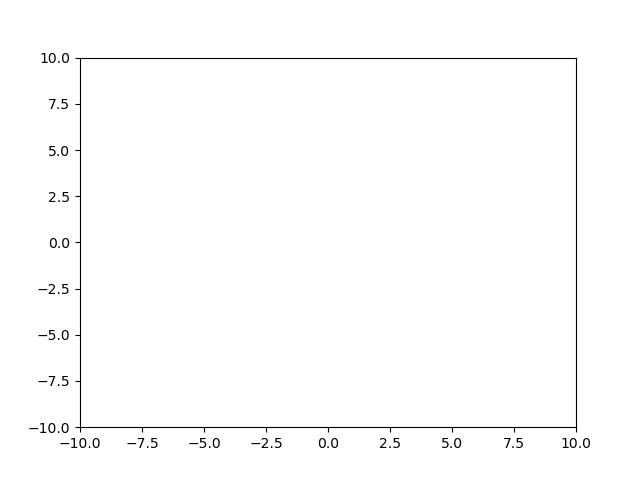

In [47]:
# Test particle system
np.random.seed(0)  # Set random seed for reproducibility
N = 1000  # Number of particles
box_size = (10, 10)  # Size of bounding box

# Create random particles
particles = [Particle(COLORS[np.random.randint(2)], np.random.uniform(0, box_size[0], 2), np.random.uniform(-1, 1, 2), 1, 0) for _ in range(N)]
system = ParticleSystem(particles, box_size)

# Create figure and axis for animation
fig, ax = plt.subplots()
ax.set_xlim(-1*box_size[0], box_size[0])
ax.set_ylim(-1*box_size[1], box_size[1])

# Initialize empty plots
plots = [ax.plot([], [], 'o', color=p.color)[0] for p in particles]

# Animation function
def animate(i):
    # Update and interact particles
    system.update(0.05)
    system.interact()
  
    # Update plot data
    for p, plot in zip(particles, plots):
        plot.set_data(p.pos[0], p.pos[1])
    
    #plt.pause(0.001)
    return plots

# Create and display animation
anim = animation.FuncAnimation(fig, animate, frames=100, interval=100)
plt.show()

In [43]:
# Print final state of particles
for p in system.particles:
    print(f'Color: {p.color}, Position: {p.pos}, Velocity: {p.vel}, Mass: {p.mass}, Gravity: {p.gravity}')

Color: Red, Position: [5.93560509 8.44960252], Velocity: [-0.71589124 -0.69450348], Mass: 1, Gravity: 0
Color: Blue, Position: [6.46677659 4.38514537], Velocity: [0.11797026 0.37679309], Mass: 2, Gravity: 1.3348e-10
Color: Red, Position: [4.77625072 8.11954298], Velocity: [0.04004566 0.21443041], Mass: 1, Gravity: 0
Color: Blue, Position: [0.70076495 0.87794539], Velocity: [-0.46458962  0.62810813], Mass: 2, Gravity: 1.3348e-10
Color: Red, Position: [1.40297997 8.7068908 ], Velocity: [ 0.27249033 -0.13721148], Mass: 2, Gravity: 1.3348e-10
Color: Blue, Position: [7.80809018 1.17561132], Velocity: [ 0.24378397 -0.42123553], Mass: 2, Gravity: 1.3348e-10
Color: Blue, Position: [7.58562825 1.05280272], Velocity: [0.05279916 0.62733531], Mass: 1, Gravity: 0
Color: Red, Position: [4.55187912 5.6866922 ], Velocity: [-0.17433589 -0.16027148], Mass: 2, Gravity: 1.3348e-10
Color: Red, Position: [2.23126585 3.86388881], Velocity: [-0.80519695  0.10010002], Mass: 1, Gravity: 0
Color: Blue, Position

<IPython.core.display.Javascript object>


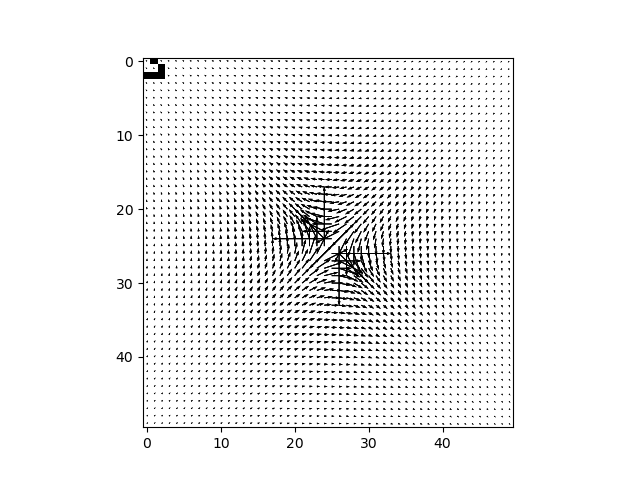

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# The size of the grid
N = 50

# Set up the grid
grid = np.zeros((N, N))

# Set up the initial configuration
# (in this case, a glider)
grid[0, 1] = 1
grid[1, 2] = 1
grid[2, 0] = 1
grid[2, 1] = 1
grid[2, 2] = 1

# Set up the plot
fig, ax = plt.subplots()
im = ax.imshow(grid, cmap='binary')

# Function to update the plot
def update(frame):
  # Calculate the number of neighbors for each cell
  neighbors = np.zeros((N, N))
  for i in range(N):
    for j in range(N):
      neighbors[i, j] = sum(
        grid[i-1, j-1:j+2] +
        grid[i,   j-1:j+2] +
        grid[i+1, j-1:j+2]
      ) - grid[i, j]

  # Apply the rules of the Game of Life
  for i in range(N):
    for j in range(N):
      if grid[i, j] == 1:
        if neighbors[i, j] < 2 or neighbors[i, j] > 3:
          grid[i, j] = 0
      else:
        if neighbors[i, j] == 3:
          grid[i, j] = 1
  im.set_data(grid)
  return im

# Animate the plot
ani = animation.FuncAnimation(fig, update, frames=range(100), blit=True)
plt.show()

<IPython.core.display.Javascript object>


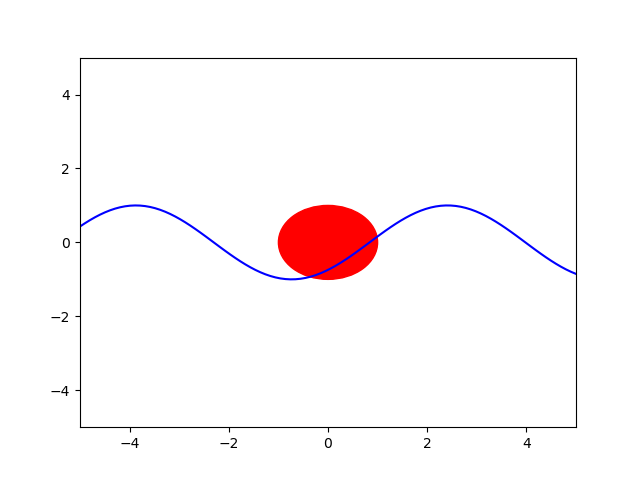

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set up the figure and axes
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

# Create a circle to represent the vortex
circle = plt.Circle((0, 0), radius=1, color='r')
ax.add_artist(circle)

# Create a line to represent the flow of the fluid
line, = ax.plot([], [], 'b-')

# Create a function to update the plot at each frame
def update(num):
    # Compute the new positions for the fluid flow line
    x = np.linspace(-5, 5, 100)
    y = np.sin(x + num*np.pi/30)
    
    # Set the new data for the line
    line.set_data(x, y)
    
    return line,

# Create the animation object
anim = FuncAnimation(fig, update, frames=range(60), interval=100)

plt.show()

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Set the size of the grid
N = 50

# Set the maximum number of iterations
max_iters = 500

# Set the initial velocity field
u = np.zeros((N, N))
v = np.zeros((N, N))

# Set the initial position of the vortex
x_vortex, y_vortex = 25, 25

# Set the strength of the vortex
gamma = 5.0

# Set the timestep
dt = 0.01

# Generate the grid of coordinates
X, Y = np.meshgrid(np.arange(N), np.arange(N))

# Iterate through the timesteps
for i in range(max_iters):
    # Calculate the velocity field at the next timestep
    for j in range(N):
        for k in range(N):
            distance = ((X[j, k]-x_vortex)**2+(Y[j, k]-y_vortex)**2)
            if distance > 0:
                u[j, k] = +gamma/(2*np.pi) * (Y[j, k]-y_vortex)/distance
                v[j, k] = -gamma/(2*np.pi) * (X[j, k]-x_vortex)/distance
    
    # Update the position of the vortex
    if not np.isnan(u[int(round(x_vortex)), int(round(y_vortex))]) and not np.isnan(v[int(round(x_vortex)), int(round(y_vortex))]):
        x_vortex += u[int(round(x_vortex)), int(round(y_vortex))]*dt
        y_vortex += v[int(round(x_vortex)), int(round(y_vortex))]*dt
    
    # Check if the vortex has left the grid
    if x_vortex < 0 or x_vortex > N-1 or y_vortex < 0 or y_vortex > N-1:
        break

# Plot the velocity field
plt.quiver(X, Y, u, v)
plt.show()